In [149]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import SpectralEmbedding
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.cluster.hierarchy import ward, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [82]:
# Read in the basketball-reference dataframe
df = pd.read_csv(r"C:\Users\vaugh\Desktop\basketball-pf-research\Basketball-reference data\df_with_all_pf(2001-2024).csv")
df.set_index(['Season', 'Player'], inplace=True)

In [83]:
df

USG%        FGA  Personal Fouls Committed       BLK  \
Season Player                                                                 
2001   A.C. Green       14.4  11.158044                  4.184266  0.278951   
       Aaron Williams   17.8  13.310959                  6.571233  2.358904   
       Adam Keefe       11.5   9.232536                  5.770335  1.154067   
       Al Harrington    18.8  13.852008                  5.738689  0.395772   
       Alan Henderson   22.6  17.810387                  4.259006  0.774365   
...                      ...        ...                       ...       ...   
2024   Trey Lyles       14.4  13.222798                  3.606218  0.721244   
       Usman Garuba     20.8  16.000000                  4.800000  8.000000   
       Wenyen Gabriel   17.0  13.037037                  5.925926  1.185185   
       Zeke Nnaji       15.4  12.566667                  6.766667  3.383333   
       Zion Williamson  29.7  23.749887                  3.501586  1.065700   

                             STL        DRB       ORB       TOV       AST  \
Season Player                                                               
2001   A.C. Green       1.115804   6.973777  3.626364  1.394755  1.394755   
       Aaron Williams   1.179452   7.750685  4.380822  2.695890  1.853425   
       Adam Keefe       1.538756   6.924402  5.000957  2.308134  1.923445   
       Al Harrington    1.583087   6.728118  2.968288  3.759831  3.364059   
       Alan Henderson   1.355138   6.001326  4.839779  3.291050  1.355138   
...                          ...        ...       ...       ...       ...   
2024   Trey Lyles       0.721244   8.174093  2.644560  1.682902  2.884974   
       Usman Garuba     3.200000  11.200000  8.000000  4.800000  3.200000   
       Wenyen Gabriel   1.185185  10.666667  4.148148  4.740741  1.777778   
       Zeke Nnaji       1.450000   5.316667  5.316667  2.416667  2.900000   
       Zion Williamson  1.674671   6.241957  2.588129  4.262800  7.612143   

                        % of FG Ast'd - 3P  % of FG Ast'd - 2P    FTr  \
Season Player                                                           
2001   A.C. Green                    0.000               0.764  0.343   
       Aaron Williams                0.000               0.623  0.477   
       Adam Keefe                    1.000               0.683  0.396   
       Al Harrington                 0.000               0.675  0.289   
       Alan Henderson                0.000               0.537  0.404   
...                                    ...                 ...    ...   
2024   Trey Lyles                    1.000               0.729  0.218   
       Usman Garuba                  0.000               0.000  0.333   
       Wenyen Gabriel                1.000               0.714  0.227   
       Zeke Nnaji                    1.000               0.619  0.416   
       Zion Williamson               0.833               0.474  0.452   

                        Shooting Fouls Drawn  Corner 3s - %3PA  \
Season Player                                                    
2001   A.C. Green                   1.496811             0.167   
       Aaron Williams               2.691781             0.000   
       Adam Keefe                   1.435407             0.333   
       Al Harrington                1.649049             0.143   
       Alan Henderson               3.288398             0.000   
...                                      ...               ...   
2024   Trey Lyles                   1.409326             0.384   
       Usman Garuba                 2.666667             0.000   
       Wenyen Gabriel               1.777778             0.500   
       Zeke Nnaji                   2.166667             0.391   
       Zion Williamson              5.893974             0.111   

                        % of FGA by Distance - 3P  \
Season Player                                       
2001   A.C. Green                           0.019   
       Aaron Williams     

In [51]:
corr_matrix = df.corr()

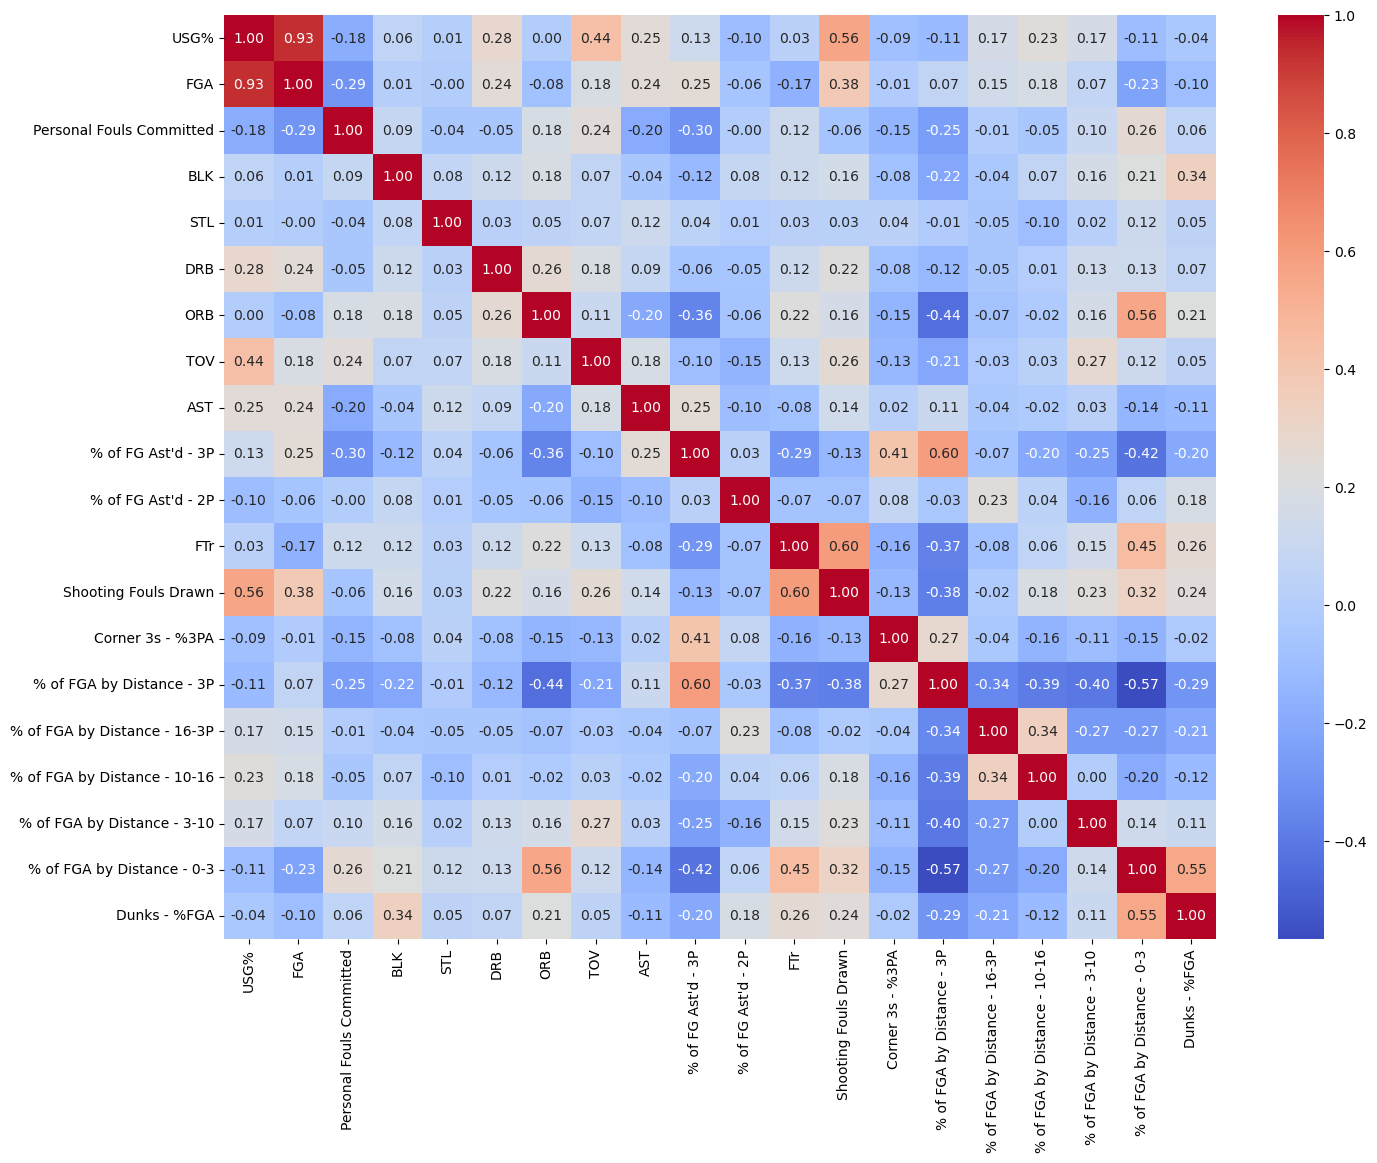

In [52]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.show()

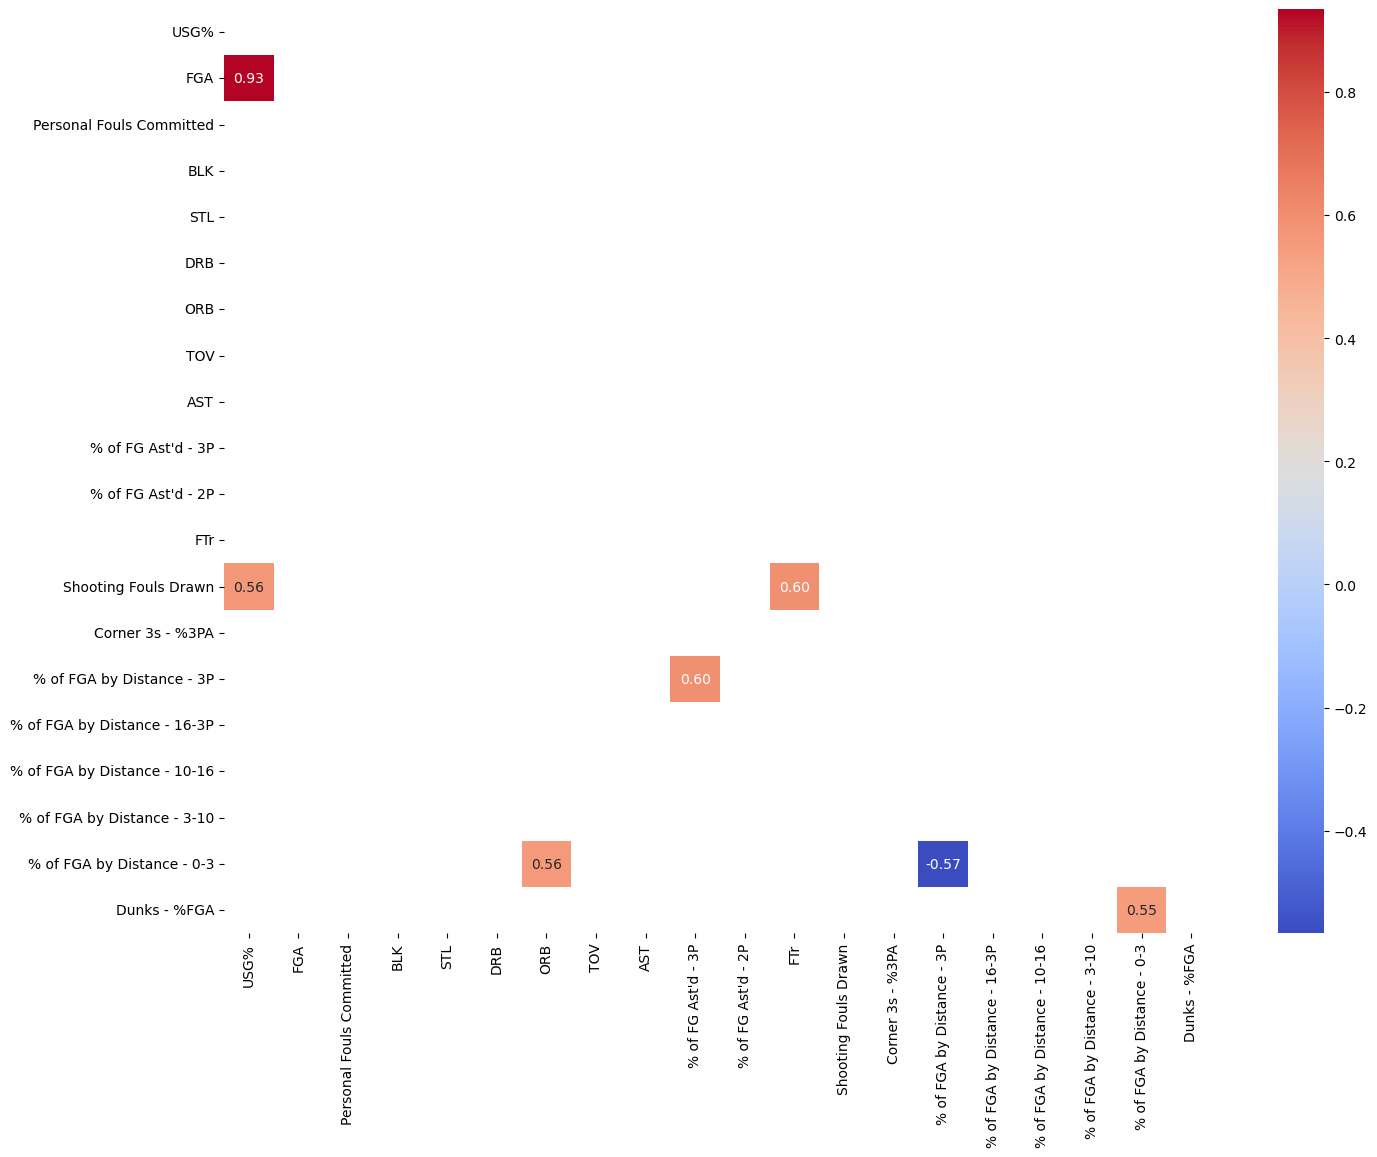

In [53]:
threshold = 0.5  # Only show correlations greater than 0.5
filtered_corr = corr_matrix[corr_matrix.abs() > threshold]

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, mask=mask)
plt.show()

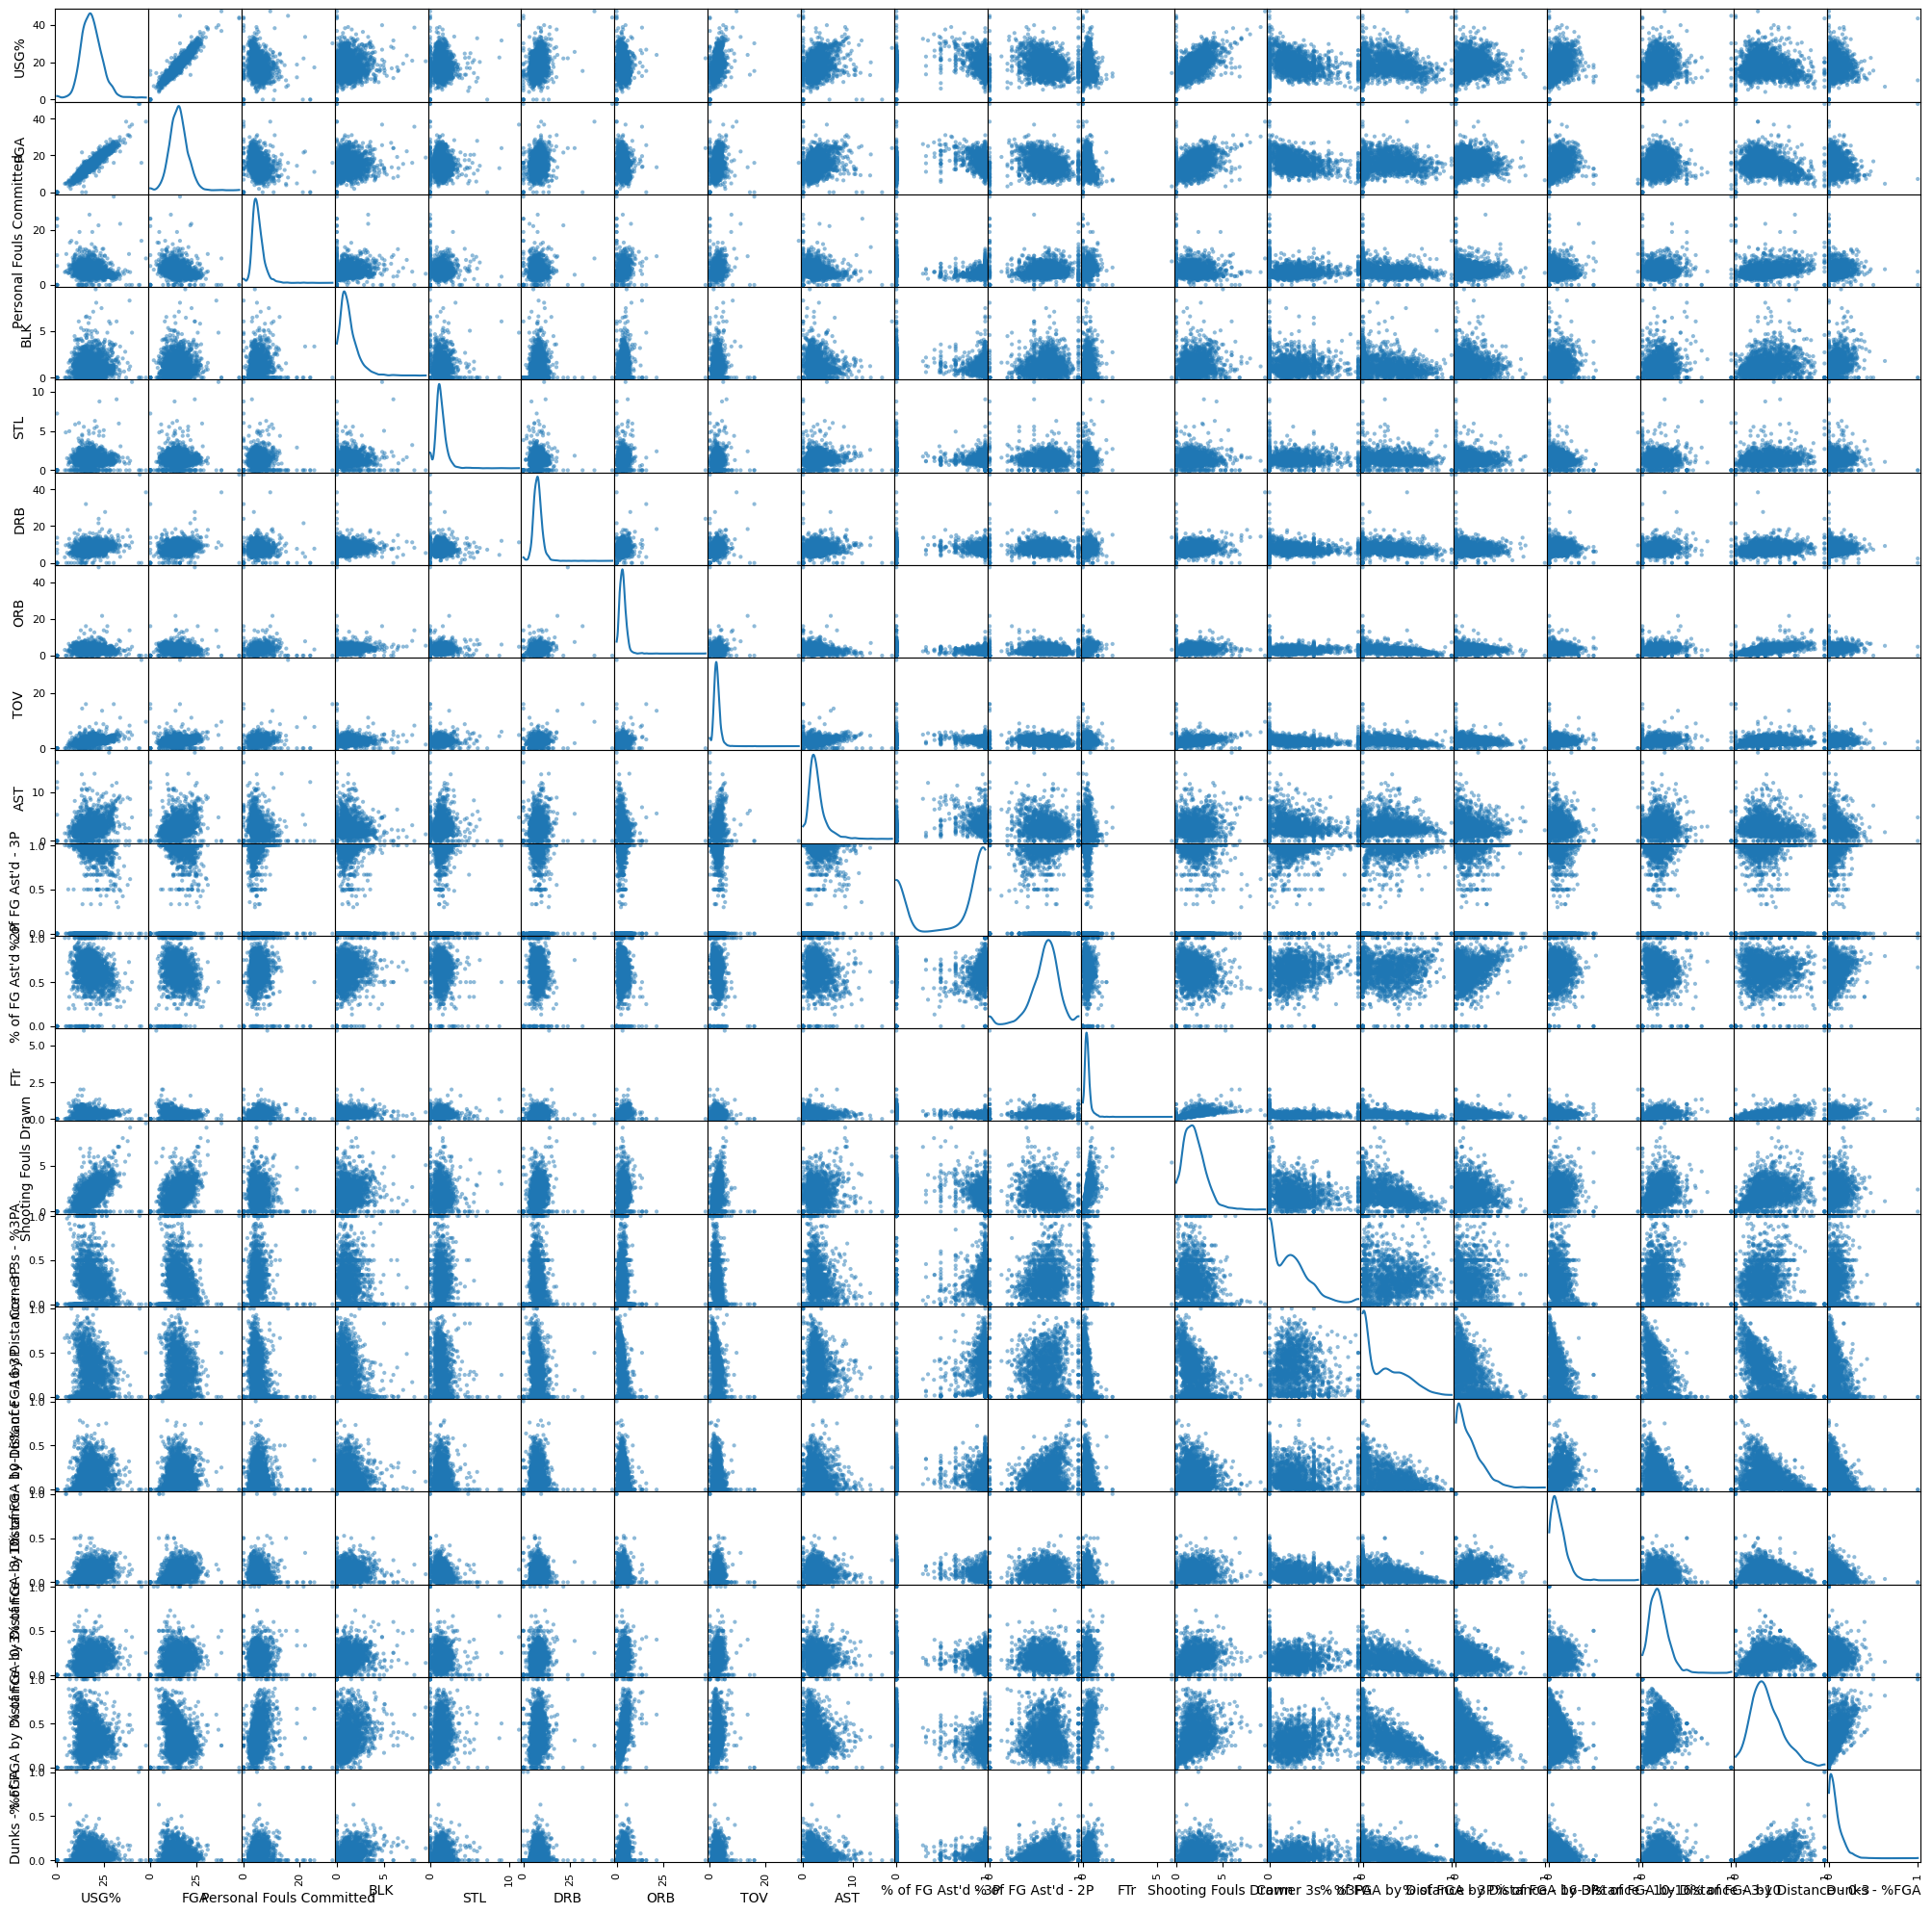

In [54]:
# Create the scatter matrix plot
scatter_matrix(df, figsize=(25, 25), diagonal='kde')
plt.show()

In [84]:
df.drop(columns = ['FGA', 'Shooting Fouls Drawn', 'Dunks - %FGA', 'Personal Fouls Committed'], inplace=True)
df['TRB'] = df['ORB'] + df['DRB']

In [85]:
df

USG%       BLK       STL        DRB       ORB  \
Season Player                                                           
2001   A.C. Green       14.4  0.278951  1.115804   6.973777  3.626364   
       Aaron Williams   17.8  2.358904  1.179452   7.750685  4.380822   
       Adam Keefe       11.5  1.154067  1.538756   6.924402  5.000957   
       Al Harrington    18.8  0.395772  1.583087   6.728118  2.968288   
       Alan Henderson   22.6  0.774365  1.355138   6.001326  4.839779   
...                      ...       ...       ...        ...       ...   
2024   Trey Lyles       14.4  0.721244  0.721244   8.174093  2.644560   
       Usman Garuba     20.8  8.000000  3.200000  11.200000  8.000000   
       Wenyen Gabriel   17.0  1.185185  1.185185  10.666667  4.148148   
       Zeke Nnaji       15.4  3.383333  1.450000   5.316667  5.316667   
       Zion Williamson  29.7  1.065700  1.674671   6.241957  2.588129   

                             TOV       AST  % of FG Ast'd - 3P  \
Season Player                                                    
2001   A.C. Green       1.394755  1.394755               0.000   
       Aaron Williams   2.695890  1.853425               0.000   
       Adam Keefe       2.308134  1.923445               1.000   
       Al Harrington    3.759831  3.364059               0.000   
       Alan Henderson   3.291050  1.355138               0.000   
...                          ...       ...                 ...   
2024   Trey Lyles       1.682902  2.884974               1.000   
       Usman Garuba     4.800000  3.200000               0.000   
       Wenyen Gabriel   4.740741  1.777778               1.000   
       Zeke Nnaji       2.416667  2.900000               1.000   
       Zion Williamson  4.262800  7.612143               0.833   

                        % of FG Ast'd - 2P    FTr  Corner 3s - %3PA  \
Season Player                                                         
2001   A.C. Green                    0.764  0.343             0.167   
       Aaron Williams                0.623  0.477             0.000   
       Adam Keefe                    0.683  0.396             0.333   
       Al Harrington                 0.675  0.289             0.143   
       Alan Henderson                0.537  0.404             0.000   
...                                    ...    ...               ...   
2024   Trey Lyles                    0.729  0.218             0.384   
       Usman Garuba                  0.000  0.333             0.000   
       Wenyen Gabriel                0.714  0.227             0.500   
       Zeke Nnaji                    0.619  0.416             0.391   
       Zion Williamson               0.474  0.452             0.111   

                        % of FGA by Distance - 3P  \
Season Player                                       
2001   A.C. Green                           0.019   
       Aaron Williams                       0.003   
       Adam Keefe                           0.019   
       Al Harrington                        0.013   
       Alan Henderson                       0.001   
...                                           ...   
2024   Trey Lyles                           0.682   
       Usman Garuba                         0.167   
       Wenyen Gabriel                       0.273   
       Zeke Nnaji                           0.154   
       Zion Williamson                      0.016   

                        % of FGA by Distance - 16-3P  \
Season Player                                          
2001   A.C. Green                              0.438   
       Aaron Williams                          0.103   
       Adam Keefe                              0.258   
       Al Harrington                           0.210   
       Alan Henderson                          0.051   
...                                              ...   
2024   Trey Lyles                              0.019   
       Usman Garuba                            0.000   
       Wenyen Gabriel                    

In [140]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

In [141]:
scaled_df

USG%       BLK       STL       DRB       ORB  \
Season Player                                                              
2001   A.C. Green      -0.736527 -0.980401 -0.277127 -0.290484  0.168899   
       Aaron Williams  -0.095009  1.151313 -0.194997  0.003306  0.543318   
       Adam Keefe      -1.283703 -0.083508  0.268644 -0.309155  0.851076   
       Al Harrington    0.093672 -0.860674  0.325848 -0.383380 -0.157688   
       Alan Henderson   0.810662 -0.472659  0.031706 -0.658219  0.771087   
...                          ...       ...       ...       ...       ...   
2024   Trey Lyles      -0.736527 -0.527102 -0.786263  0.163419 -0.318346   
       Usman Garuba     0.471035  6.932791  2.412292  1.307673  2.339426   
       Wenyen Gabriel  -0.245955 -0.051615 -0.187599  1.105992  0.427848   
       Zeke Nnaji      -0.547845  2.201236  0.154115 -0.917124  1.007755   
       Zion Williamson  2.150301 -0.174074  0.444028 -0.567223 -0.346351   

                             TOV       AST  % of FG Ast'd - 3P  \
Season Player                                                    
2001   A.C. Green      -0.826436 -0.764748           -1.353489   
       Aaron Williams   0.134016 -0.502728           -1.353489   
       Adam Keefe      -0.152212 -0.462728            0.832492   
       Al Harrington    0.919379  0.360240           -1.353489   
       Alan Henderson   0.573342 -0.787380           -1.353489   
...                          ...       ...                 ...   
2024   Trey Lyles      -0.613737  0.086557            0.832492   
       Usman Garuba     1.687196  0.266519           -1.353489   
       Wenyen Gabriel   1.643452 -0.545942            0.832492   
       Zeke Nnaji      -0.072097  0.095141            0.832492   
       Zion Williamson  1.290654  2.787008            0.467434   

                        % of FG Ast'd - 2P       FTr  Corner 3s - %3PA  \
Season Player                                                            
2001   A.C. Green                 0.807403  0.182016         -0.232709   
       Aaron Williams            -0.017263  0.782241         -0.979649   
       Adam Keefe                 0.333659  0.419418          0.509757   
       Al Harrington              0.286869 -0.059867         -0.340054   
       Alan Henderson            -0.520251  0.455253         -0.979649   
...                                    ...       ...               ...   
2024   Trey Lyles                 0.602699 -0.377897          0.737865   
       Usman Garuba              -3.661001  0.137223         -0.979649   
       Wenyen Gabriel             0.514968 -0.337583          1.256697   
       Zeke Nnaji                -0.040658  0.509004          0.769174   
       Zion Williamson           -0.888719  0.670259         -0.483180   

                        % of FGA by Distance - 3P  \
Season Player                                       
2001   A.C. Green                       -0.852888   
       Aaron Williams                   -0.923118   
       Adam Keefe                       -0.852888   
       Al Harrington                    -0.879224   
       Alan Henderson                   -0.931896   
...                                           ...   
2024   Trey Lyles                        2.057250   
       Usman Garuba                     -0.203264   
       Wenyen Gabriel                    0.262007   
       Zeke Nnaji                       -0.260326   
       Zion Williamson                  -0.866056   

                        % of FGA by Distance - 16-3P  \
Season Player                                          
2001   A.C. Green                           2.202116   
       Aaron Williams                      -0.330841   
       Adam Keefe                           0.841124   
       Al Harrington                        0.478193   
       Alan Henderson                      -0.724016   
...                                              ...   
2024   Trey Lyles                          -0.965970   
       Usman Garuba    

In [133]:
features_dict = {'12 most important': list(df.columns[~df.columns.isin(['STL', 'Corner 3s - %3PA', 'DRB', 'ORB', 'TOV'])]), 'all (excluding TRB)': list(df.columns[df.columns != 'TRB']), 'all excluding STL and TRB': list(df.columns[~df.columns.isin(['STL', 'TRB'])]), 'all excluding TOV and TRB': list(df.columns[~df.columns.isin(['TOV', 'TRB'])]), 'all excluding corner 3s and TRB': list(df.columns[~df.columns.isin(['Corner 3s - %3PA', 'TRB'])]), 'all excluding ORB and DRB': list(df.columns[~df.columns.isin(['ORB', 'DRB'])])}

In [134]:
le_dict = {}
for features in features_dict:
    embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors')
    transformed_data = embedding.fit_transform(scaled_df[features_dict[features]])
    le_dict[features] = transformed_data

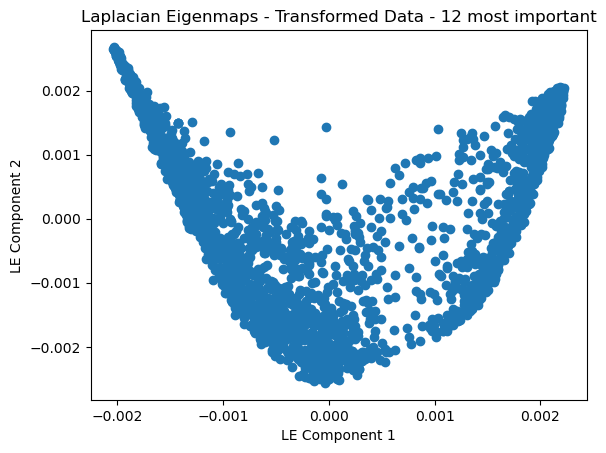

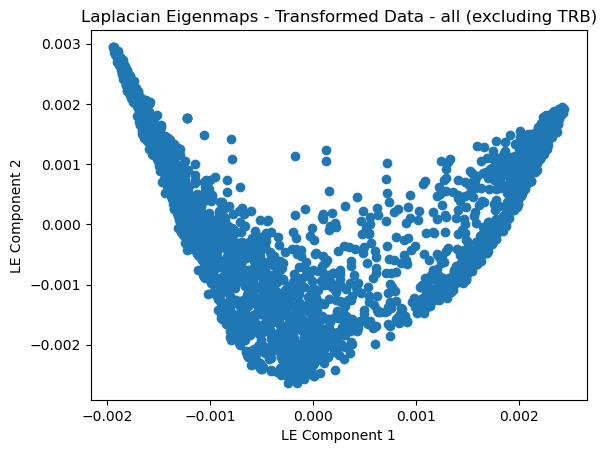

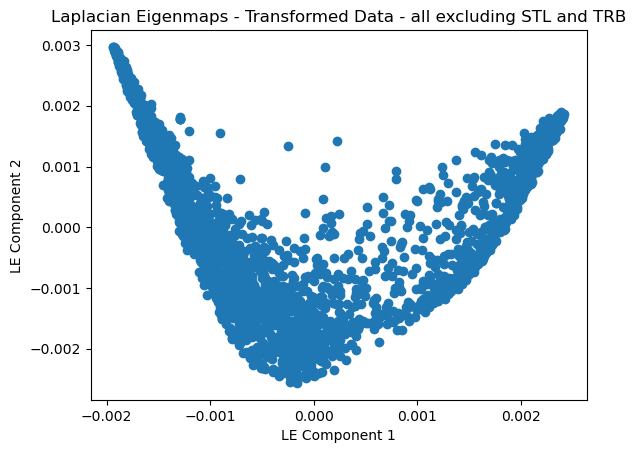

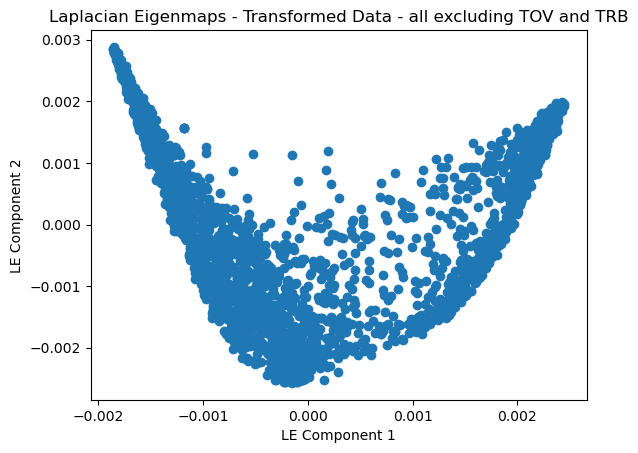

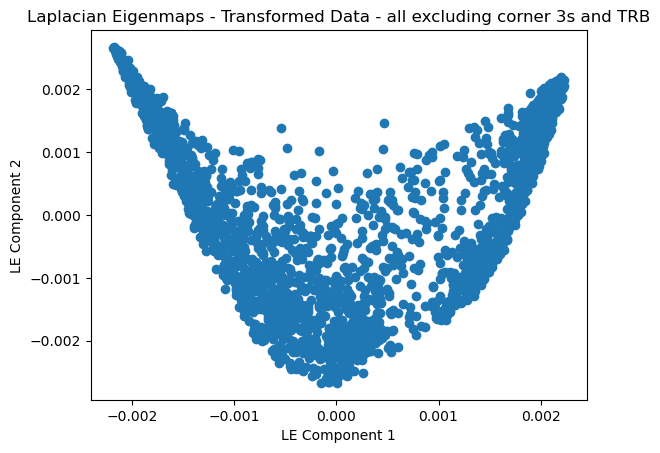

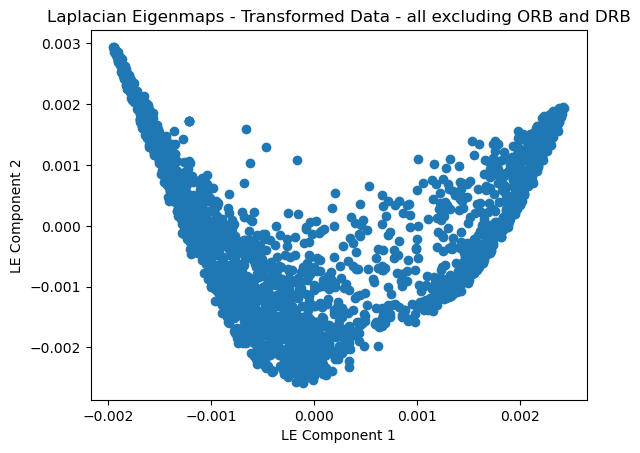

In [135]:
for features in le_dict:
    plt.scatter(le_dict[features][:, 0], le_dict[features][:, 1])
    plt.title(f'Laplacian Eigenmaps - Transformed Data - {features}')
    plt.xlabel('LE Component 1')
    plt.ylabel('LE Component 2')
    plt.show()

In [ ]:
for features in le_dict:
    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(le_dict[features][:, 0], le_dict[features][:, 1], le_dict[features][:, 2])

    # Set labels and title
    ax.set_xlabel('LE Component 1')
    ax.set_ylabel('LE Component 2')
    ax.set_zlabel('LE Component 3')
    ax.set_title('3D Laplacian Eigenmaps Embedding')

    # Show the plot
    plt.show()

In [136]:
tSNE_dict = {}
for features in features_dict:
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(scaled_df[features_dict[features]])
    tSNE_dict[features] = tsne_results

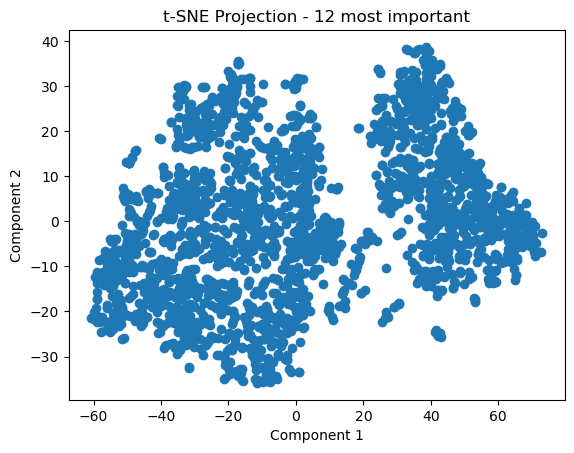

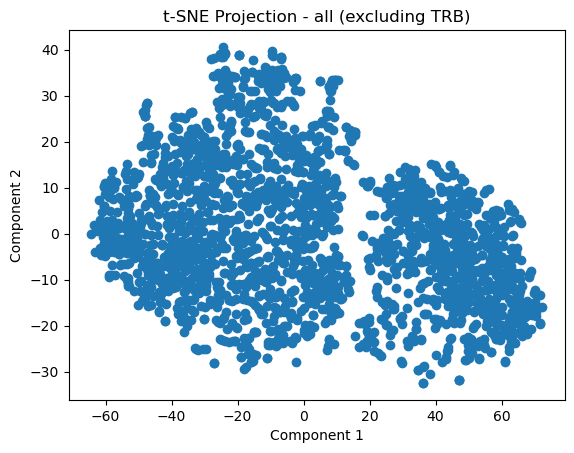

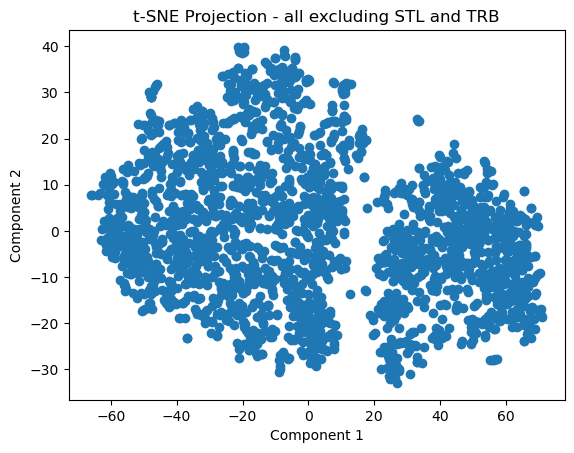

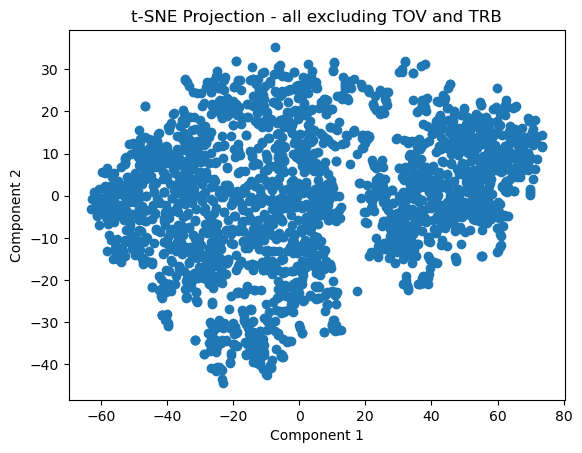

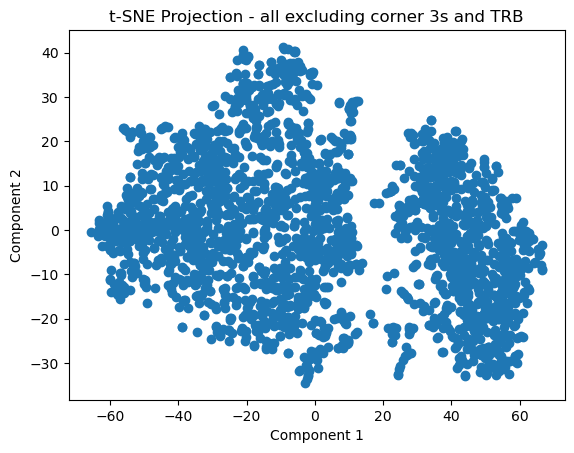

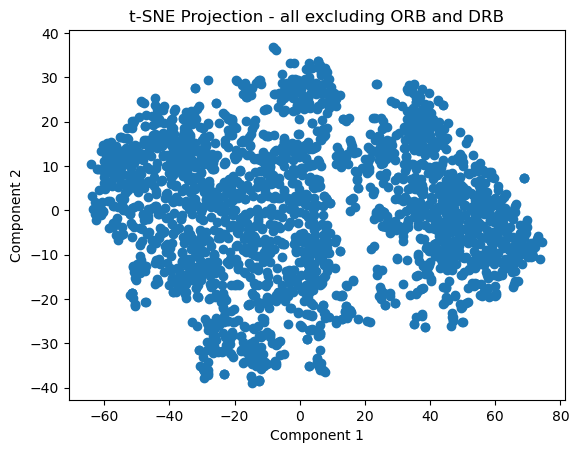

In [137]:
for features in tSNE_dict:
    plt.scatter(tSNE_dict[features][:, 0], tSNE_dict[features][:, 1])
    plt.title(f't-SNE Projection - {features}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

In [142]:
condensed_scaled_df = scaled_df.drop(columns = ['STL', 'Corner 3s - %3PA', 'DRB', 'ORB', 'TOV'])
condensed_scaled_df

USG%       BLK       AST  % of FG Ast'd - 3P  \
Season Player                                                              
2001   A.C. Green      -0.736527 -0.980401 -0.764748           -1.353489   
       Aaron Williams  -0.095009  1.151313 -0.502728           -1.353489   
       Adam Keefe      -1.283703 -0.083508 -0.462728            0.832492   
       Al Harrington    0.093672 -0.860674  0.360240           -1.353489   
       Alan Henderson   0.810662 -0.472659 -0.787380           -1.353489   
...                          ...       ...       ...                 ...   
2024   Trey Lyles      -0.736527 -0.527102  0.086557            0.832492   
       Usman Garuba     0.471035  6.932791  0.266519           -1.353489   
       Wenyen Gabriel  -0.245955 -0.051615 -0.545942            0.832492   
       Zeke Nnaji      -0.547845  2.201236  0.095141            0.832492   
       Zion Williamson  2.150301 -0.174074  2.787008            0.467434   

                        % of FG Ast'd - 2P       FTr  \
Season Player                                          
2001   A.C. Green                 0.807403  0.182016   
       Aaron Williams            -0.017263  0.782241   
       Adam Keefe                 0.333659  0.419418   
       Al Harrington              0.286869 -0.059867   
       Alan Henderson            -0.520251  0.455253   
...                                    ...       ...   
2024   Trey Lyles                 0.602699 -0.377897   
       Usman Garuba              -3.661001  0.137223   
       Wenyen Gabriel             0.514968 -0.337583   
       Zeke Nnaji                -0.040658  0.509004   
       Zion Williamson           -0.888719  0.670259   

                        % of FGA by Distance - 3P  \
Season Player                                       
2001   A.C. Green                       -0.852888   
       Aaron Williams                   -0.923118   
       Adam Keefe                       -0.852888   
       Al Harrington                    -0.879224   
       Alan Henderson                   -0.931896   
...                                           ...   
2024   Trey Lyles                        2.057250   
       Usman Garuba                     -0.203264   
       Wenyen Gabriel                    0.262007   
       Zeke Nnaji                       -0.260326   
       Zion Williamson                  -0.866056   

                        % of FGA by Distance - 16-3P  \
Season Player                                          
2001   A.C. Green                           2.202116   
       Aaron Williams                      -0.330841   
       Adam Keefe                           0.841124   
       Al Harrington                        0.478193   
       Alan Henderson                      -0.724016   
...                                              ...   
2024   Trey Lyles                          -0.965970   
       Usman Garuba                        -1.109630   
       Wenyen Gabriel                      -1.109630   
       Zeke Nnaji                          -1.056703   
       Zion Williamson                     -1.086947   

                        % of FGA by Distance - 10-16  \
Season Player                                          
2001   A.C. Green                           0.706539   
       Aaron Williams                       0.316769   
       Adam Keefe                           0.777406   
       Al Harrington                        1.049064   
       Alan Henderson                       1.249855   
...                                              ...   
2024   Trey Lyles                          -0.970653   
       Usman Garuba                        -1.230500   
       Wenyen Gabriel                      -0.155679   
       Zeke Nnaji                          -0.911597   
       Zion Williamson                     -0.876163   

                        % of FGA by Distance - 3-10  \
Season Player                                         
2001   A.C. Green                         -0.735610 

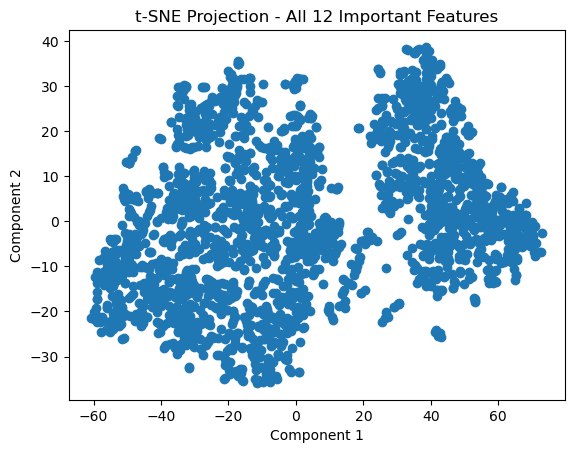

In [144]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(condensed_scaled_df)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title(f't-SNE Projection - All 12 Important Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

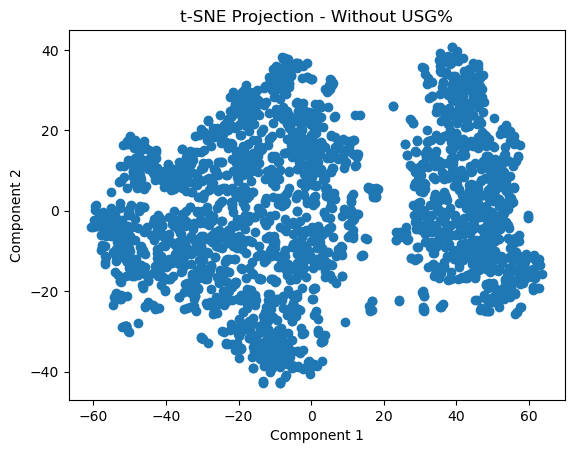

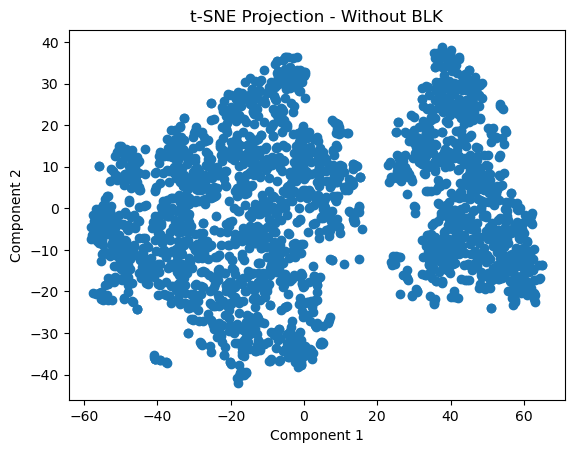

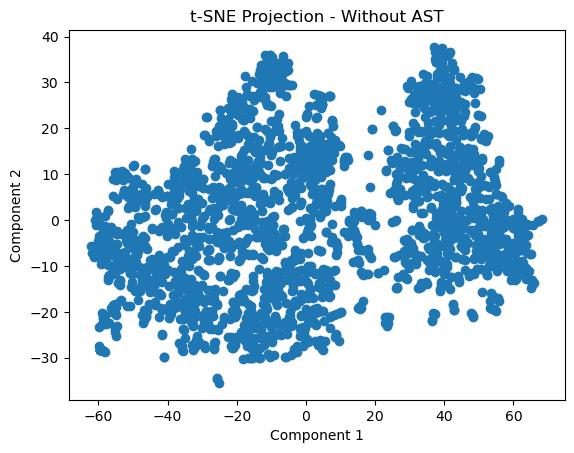

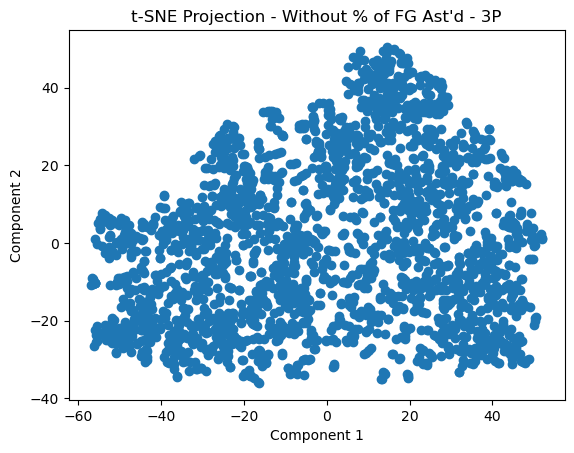

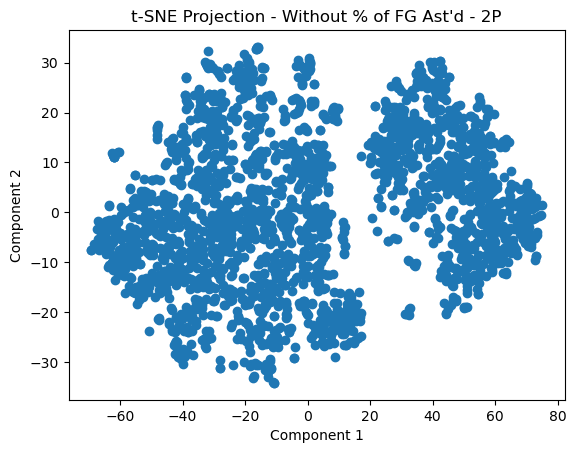

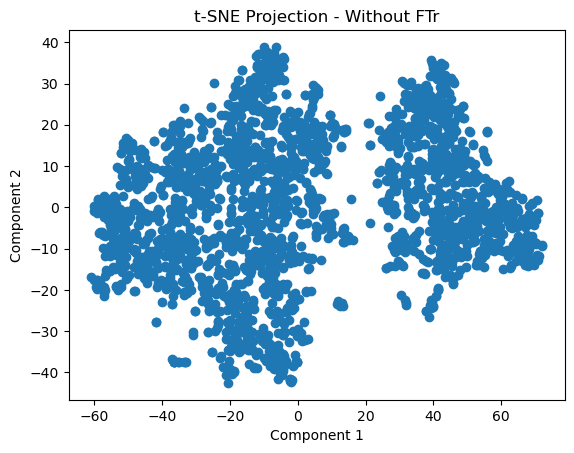

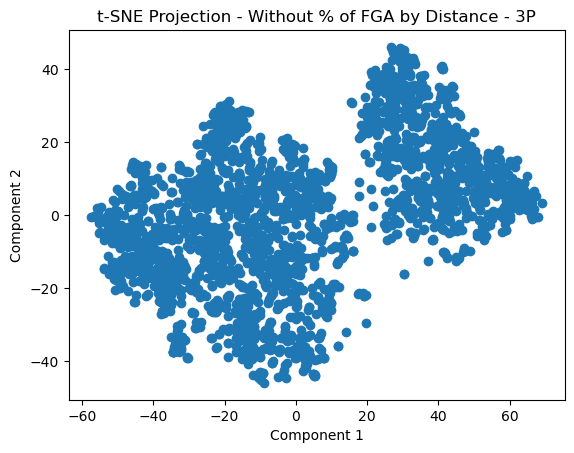

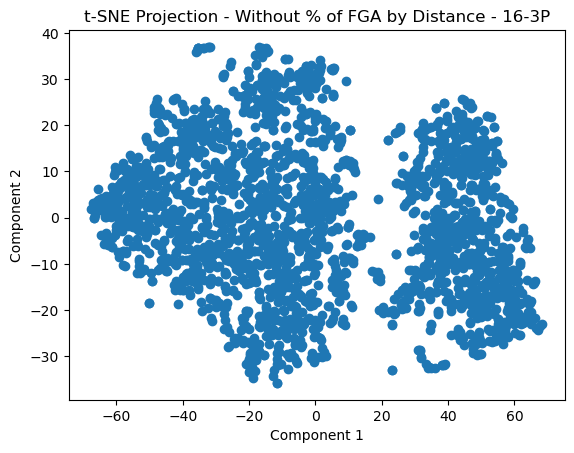

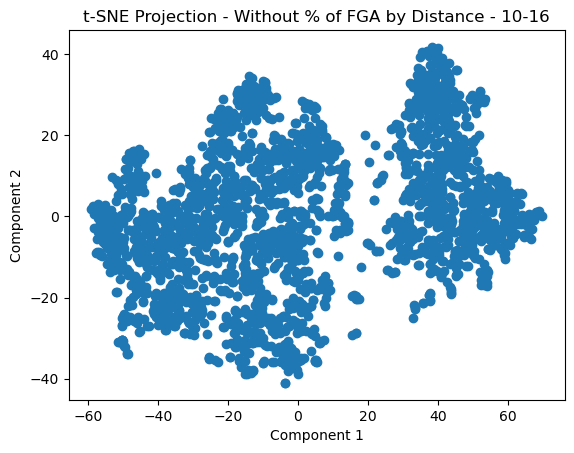

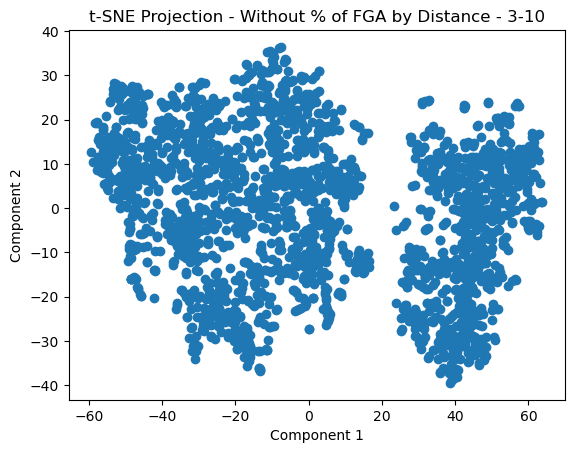

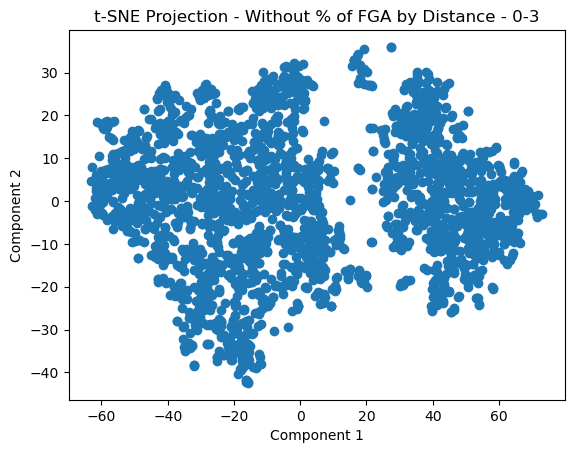

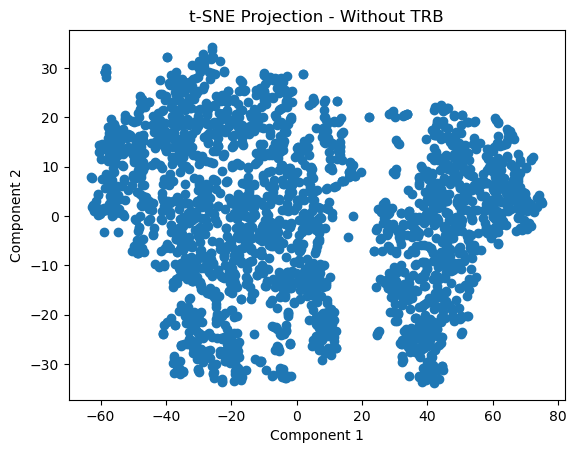

In [143]:
for col in condensed_scaled_df.columns:
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(condensed_scaled_df.drop(columns = [col]))
    
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.title(f't-SNE Projection - Without {col}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

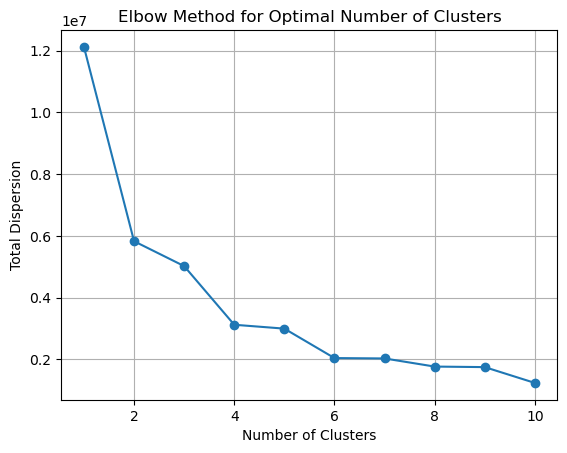

In [171]:
def calculate_dispersion(data, labels, n_clusters):
    total_dispersion = 0
    for cluster_id in range(n_clusters):
        cluster_points = data[labels == cluster_id]
        if len(cluster_points) > 1:
            pairwise_dist = pairwise_distances(cluster_points)
            cluster_dispersion = np.sum(pairwise_dist) / 2
        else:
            cluster_dispersion = 0
        total_dispersion += cluster_dispersion
    return total_dispersion

def elbow_method(data, max_clusters):
    dispersions = []
    for k in range(1, max_clusters + 1):
        ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
        clusters = ward.fit_predict(data)
        dispersion = calculate_dispersion(data, clusters, k)
        dispersions.append(dispersion)
    return dispersions

# Calculate dispersions for each cluster count
max_clusters = 10  # Adjust as needed
dispersions = elbow_method(data_array, max_clusters)

# Plot the elbow method graph
plt.plot(range(1, max_clusters + 1), dispersions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Total Dispersion')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [182]:
values = condensed_scaled_df.values

# Create the model
n_clusters = 4
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model
cluster_labels = clustering.fit_predict(values)

# Assign clusters back to the df
condensed_scaled_df['Cluster'] = cluster_labels + 1

In [183]:
condensed_scaled_df

USG%       BLK       AST  % of FG Ast'd - 3P  \
Season Player                                                              
2001   A.C. Green      -0.736527 -0.980401 -0.764748           -1.353489   
       Aaron Williams  -0.095009  1.151313 -0.502728           -1.353489   
       Adam Keefe      -1.283703 -0.083508 -0.462728            0.832492   
       Al Harrington    0.093672 -0.860674  0.360240           -1.353489   
       Alan Henderson   0.810662 -0.472659 -0.787380           -1.353489   
...                          ...       ...       ...                 ...   
2024   Trey Lyles      -0.736527 -0.527102  0.086557            0.832492   
       Usman Garuba     0.471035  6.932791  0.266519           -1.353489   
       Wenyen Gabriel  -0.245955 -0.051615 -0.545942            0.832492   
       Zeke Nnaji      -0.547845  2.201236  0.095141            0.832492   
       Zion Williamson  2.150301 -0.174074  2.787008            0.467434   

                        % of FG Ast'd - 2P       FTr  \
Season Player                                          
2001   A.C. Green                 0.807403  0.182016   
       Aaron Williams            -0.017263  0.782241   
       Adam Keefe                 0.333659  0.419418   
       Al Harrington              0.286869 -0.059867   
       Alan Henderson            -0.520251  0.455253   
...                                    ...       ...   
2024   Trey Lyles                 0.602699 -0.377897   
       Usman Garuba              -3.661001  0.137223   
       Wenyen Gabriel             0.514968 -0.337583   
       Zeke Nnaji                -0.040658  0.509004   
       Zion Williamson           -0.888719  0.670259   

                        % of FGA by Distance - 3P  \
Season Player                                       
2001   A.C. Green                       -0.852888   
       Aaron Williams                   -0.923118   
       Adam Keefe                       -0.852888   
       Al Harrington                    -0.879224   
       Alan Henderson                   -0.931896   
...                                           ...   
2024   Trey Lyles                        2.057250   
       Usman Garuba                     -0.203264   
       Wenyen Gabriel                    0.262007   
       Zeke Nnaji                       -0.260326   
       Zion Williamson                  -0.866056   

                        % of FGA by Distance - 16-3P  \
Season Player                                          
2001   A.C. Green                           2.202116   
       Aaron Williams                      -0.330841   
       Adam Keefe                           0.841124   
       Al Harrington                        0.478193   
       Alan Henderson                      -0.724016   
...                                              ...   
2024   Trey Lyles                          -0.965970   
       Usman Garuba                        -1.109630   
       Wenyen Gabriel                      -1.109630   
       Zeke Nnaji                          -1.056703   
       Zion Williamson                     -1.086947   

                        % of FGA by Distance - 10-16  \
Season Player                                          
2001   A.C. Green                           0.706539   
       Aaron Williams                       0.316769   
       Adam Keefe                           0.777406   
       Al Harrington                        1.049064   
       Alan Henderson                       1.249855   
...                                              ...   
2024   Trey Lyles                          -0.970653   
       Usman Garuba                        -1.230500   
       Wenyen Gabriel                      -0.155679   
       Zeke Nnaji                          -0.911597   
       Zion Williamson                     -0.876163   

                        % of FGA by Distance - 3-10  \
Season Player                                         
2001   A.C. Green                         -0.735610 

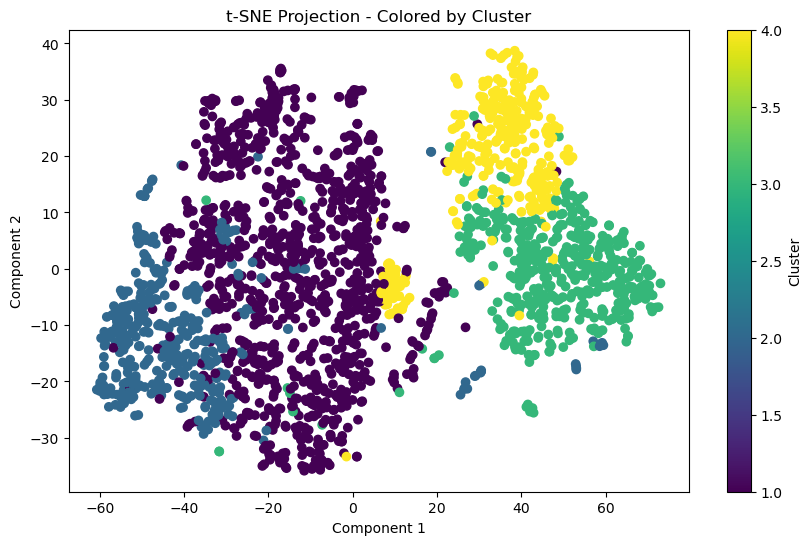

In [184]:
# Drop the "Cluster" column temporarily for t-SNE
features_only_df = condensed_scaled_df.drop(columns=['Cluster'])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_only_df)

# Plot, color-coding by the cluster assignments
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=condensed_scaled_df['Cluster'], cmap='viridis')
plt.title('t-SNE Projection - Colored by Cluster')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [186]:
tsne_results

array([[ 38.353466  ,  29.617722  ],
       [ 44.348644  ,  -4.3984776 ],
       [  0.82297456, -13.476467  ],
       ...,
       [-15.843323  , -28.084385  ],
       [-15.951666  , -32.67054   ],
       [-11.45415   ,  26.910116  ]], dtype=float32)

In [199]:
# Create the model
n_clusters = 4
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model
cluster_labels = clustering.fit_predict(tsne_results)

# Assign clusters back to the df
tsne_df = pd.DataFrame(tsne_results, columns=['Component 1', 'Component 2'])
tsne_df['Cluster'] = cluster_labels + 1

In [200]:
tsne_df

Component 1  Component 2  Cluster
0       38.353466    29.617722        2
1       44.348644    -4.398478        2
2        0.822975   -13.476467        1
3       31.033094    16.524025        2
4       36.575516     6.974904        2
...           ...          ...      ...
2309   -51.481087   -12.058932        1
2310    46.597416   -14.726110        2
2311   -15.843323   -28.084385        1
2312   -15.951666   -32.670540        1
2313   -11.454150    26.910116        4

[2314 rows x 3 columns]

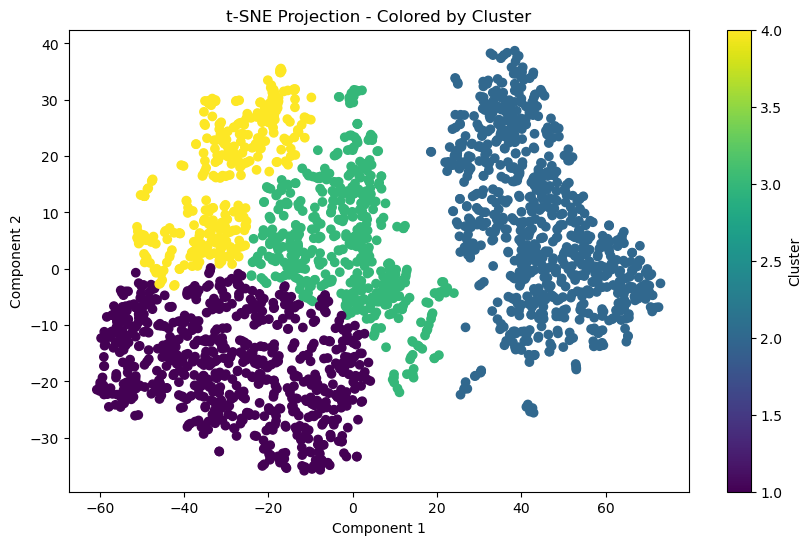

In [201]:
clustered_tsne = tsne_df.values

# Plot, color-coding by the cluster assignments
plt.figure(figsize=(10, 6))
plt.scatter(clustered_tsne[:, 0], clustered_tsne[:, 1], c=tsne_df['Cluster'], cmap='viridis')
plt.title('t-SNE Projection - Colored by Cluster')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [125]:
all_positions = pd.read_csv(r"C:\Users\vaugh\Desktop\basketball-pf-research\Data to Replicate Richardson's Results\full_dataset_before_PCA.csv")
all_positions.set_index(['Season', 'Player'], inplace=True)

In [126]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(all_positions)

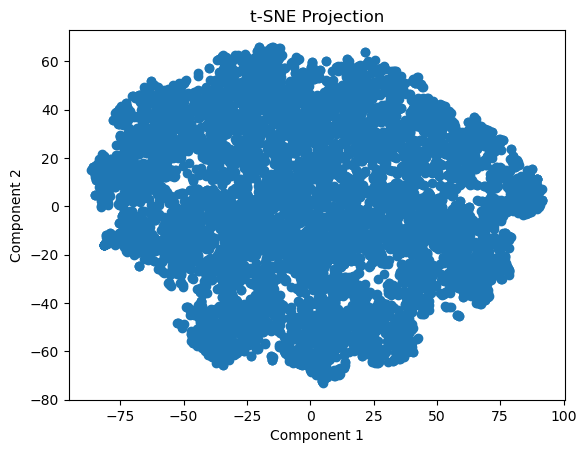

In [127]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()